# Multisensor-Based Air Quality Prediction and Index Formation Using Machine Learning



# Abstract

This study leverages a modified air quality dataset obtained from a gas multisensor device located in a polluted area within an Italian city. The dataset comprises hourly-averaged responses recorded over a one-year period from March 2004 to February 2005. 

The primary objectives of this research involve regression and classification machine learning tasks to address two distinct problems:

1. **Predicting Carbon Monoxide (CO) Concentration:**
   The first task focuses on predicting the concentration of Carbon Monoxide (CO) in mg/m3. The model aims to utilize the PT08.S1(CO) raw sensor readings, day of the week, time, and potentially temperature and humidity as input features. The ground truth for this task is provided by the CO(GT) values obtained from a co-located reference certified analyzer.

2. **Air Quality Index (AQI) Prediction:**
   The second task involves defining a custom Air Quality Index by combining ground-truth readings of various gases, including Non-Methanic Hydrocarbons (NMHC), Benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2). Machine learning models will be employed to predict this newly defined AQI using raw sensor readings and other relevant columns, excluding the ground truth columns.

The methodology encompasses data ingestion, preparation, and segregation to facilitate the subsequent training and evaluation of machine learning models for each task. The study addresses challenges such as cross-sensitivities, concept drifts, and sensor drifts, which may impact the accuracy of concentration estimations by the sensors. The outcomes of this research are anticipated to contribute to the advancement of air quality monitoring systems and the development of predictive models for effective pollution control and public health management.

# An overview over the data

The dataset includes 9357 hourly readings from a multisensor device with 5 metal oxide chemical sensors placed in a polluted area in an Italian city for one year. It records air quality indicators like CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2), alongside reference data from a certified analyzer. The data may show sensor issues and missing values are marked as -200. There are two additional redundant columns with missing values representated as NaN.

# A discussion on why the problems described in the tasks below are regression or classification ones

Generally, regression tasks entail forecasting a continuous value (like predicting the concentration of a gas), whereas classification tasks involve predicting a categorical label (such as determining whether air quality is good or bad).Therefore, The goal is to predict the concentration of Carbon Monoxide (CO) using a regression task So I will use regression because it predicts continuous values, like estimating the concentration of a gas.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv("AirQuality 2.csv")#load the data

In [38]:
data.shape

(9357, 17)

In [39]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6         1360       150      11.9   
1  10/03/2004  19:00:00     2.0         1292       112       9.4   
2  10/03/2004  20:00:00     2.2         1402        88       9.0   
3  10/03/2004  21:00:00     2.2         1376        80       9.2   
4  10/03/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

   T(C)    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [40]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T(C)', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [41]:
data.isna().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T(C)                0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [42]:
# This function gives details such as non-null values, dtype and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2

In [43]:
#Dropping Unnamed columns
data.drop(['Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [44]:
#Replacing null data from -200 to NaN for posterior treatment

data.replace(to_replace=-200,value=np.nan,inplace=True)

In [45]:
#Formatting Date and Time to datetime type
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True) 

In [46]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

   T(C)    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [47]:
NMHC_ratio = data['NMHC(GT)'].isna().sum()/len(data['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.23% of missing data.


In [48]:
#Removing NMHC(GT) sensor due to amount of null values

data.drop('NMHC(GT)', axis=1, inplace=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7685 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T(C)           8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [49]:
#Eliminating rows with NaN values 

data = data.dropna(how='any', axis=0)
data.reset_index(drop=True,inplace=True)

In [50]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
RH               0
AH               0
dtype: int64

In [51]:
sns.set_theme(style="whitegrid")

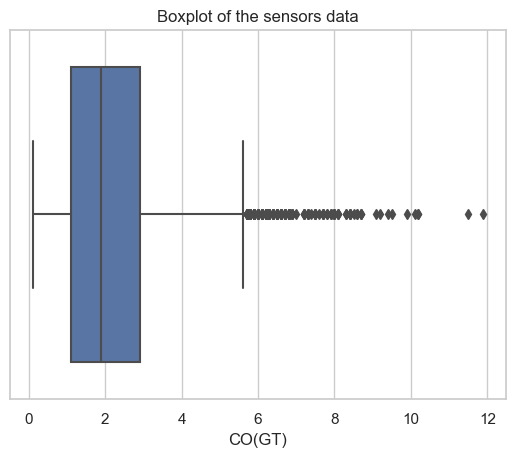

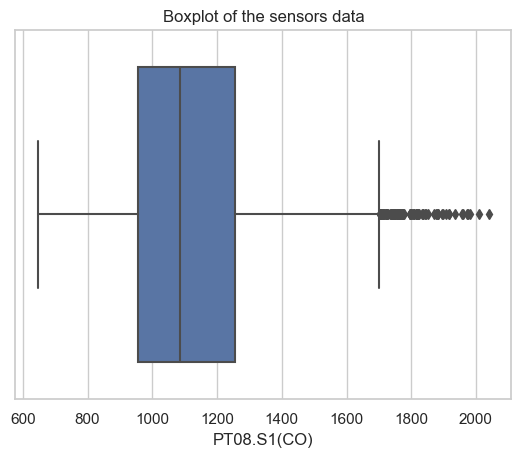

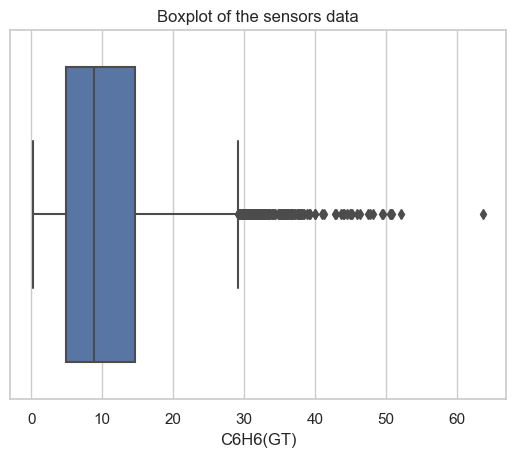

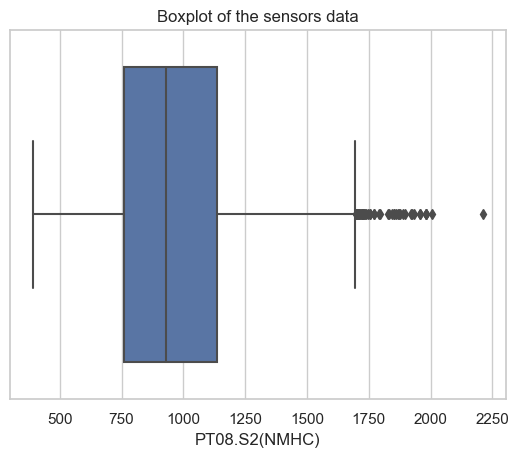

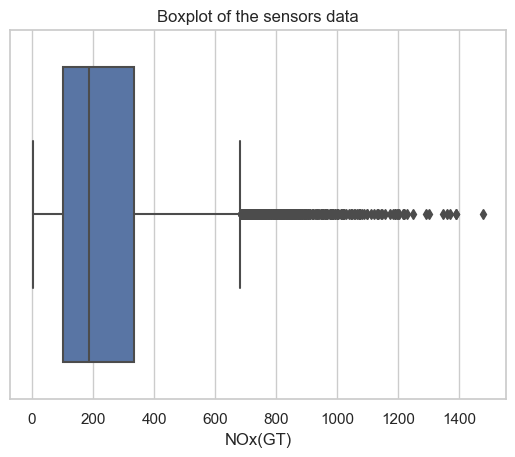

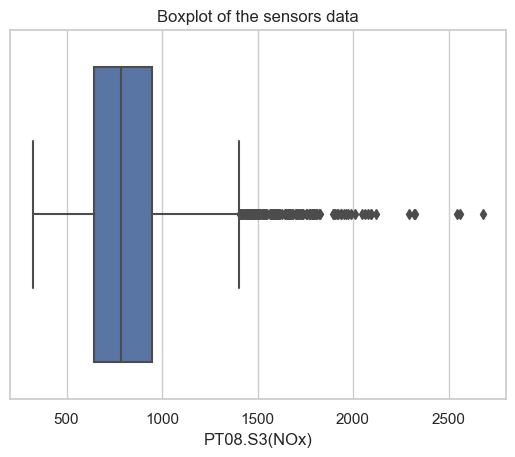

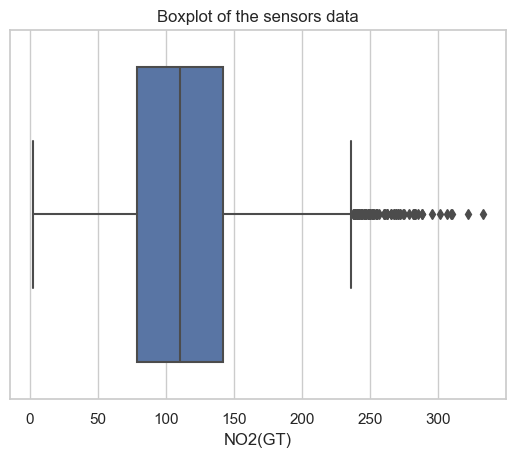

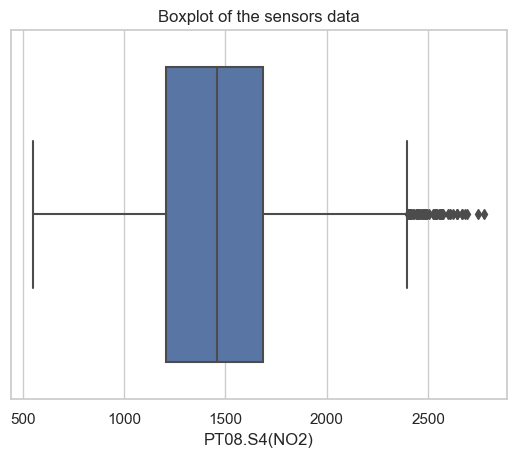

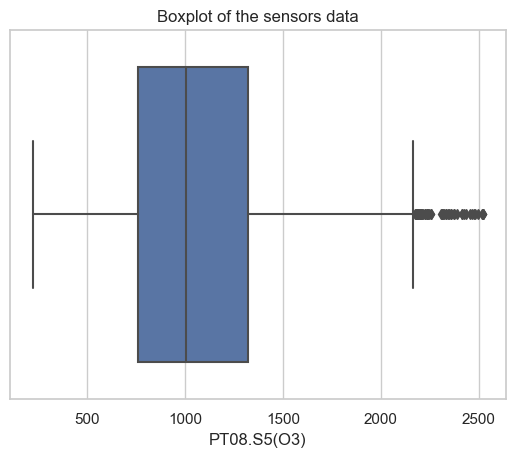

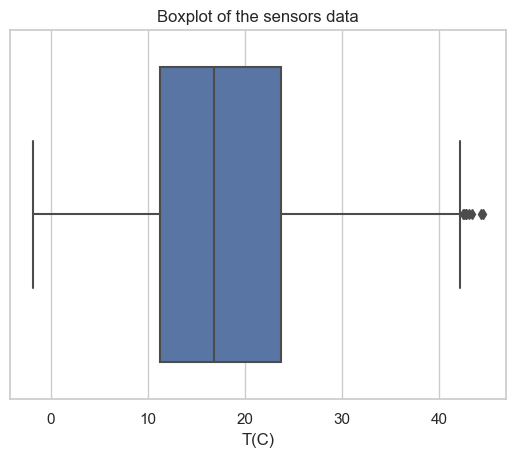

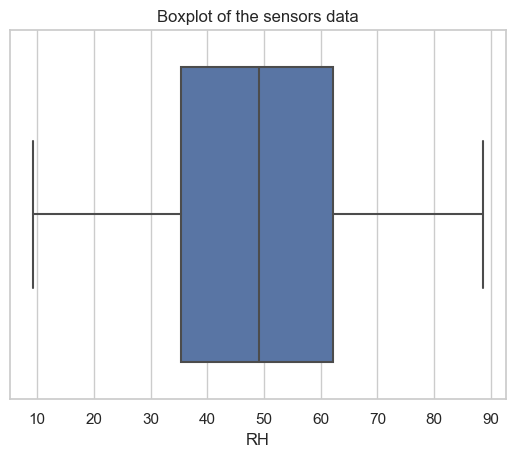

In [14]:
for i in data.columns[2:13]:
    sns.boxplot(x=data[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [52]:
data['DayOfWeek'] = data['Date'].apply(lambda x: x.weekday())#created a new column

In [53]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour.astype(float)

In [54]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0      11.9         1046.0    166.0   
1 2004-03-10  19:00:00     2.0       1292.0       9.4          955.0    103.0   
2 2004-03-10  20:00:00     2.2       1402.0       9.0          939.0    131.0   
3 2004-03-10  21:00:00     2.2       1376.0       9.2          948.0    172.0   
4 2004-03-10  22:00:00     1.6       1272.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  T(C)    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

   DayOfWeek  Hour  
0          2  18.0  
1          2  19.0  
2          2  20.0  
3          2  21.0  
4          2  22.0

In [55]:
# Define the conditions for peak and non-peak hours
peak_conditions = (
    ((data['Hour'].between(8, 12) & data['DayOfWeek'].between(0, 4)) |  # Working days
     (data['Hour'].between(18, 22) & data['DayOfWeek'].between(0, 4)) |  # Working days evening
     (data['Hour'].between(9, 12) & data['DayOfWeek'].between(5, 6)))      # Non-working days
)

# Create the 'PeakTime' column based on the conditions peak 1 and non-peak 0
data['PeakTime'] = np.where(peak_conditions, 1, 0)

In [19]:
valley_conditions = (
    (data['Hour'].between(2, 6))  # Central hours of the night
)
# Create the 'valley' column based on the conditions valley 1 and non valley 0
data['Valley'] = np.where(valley_conditions, 1, 0)

/var/folders/8l/hkbst4nd797_ythbfdyppsmc0000gn/T/ipykernel_5687/1528227841.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


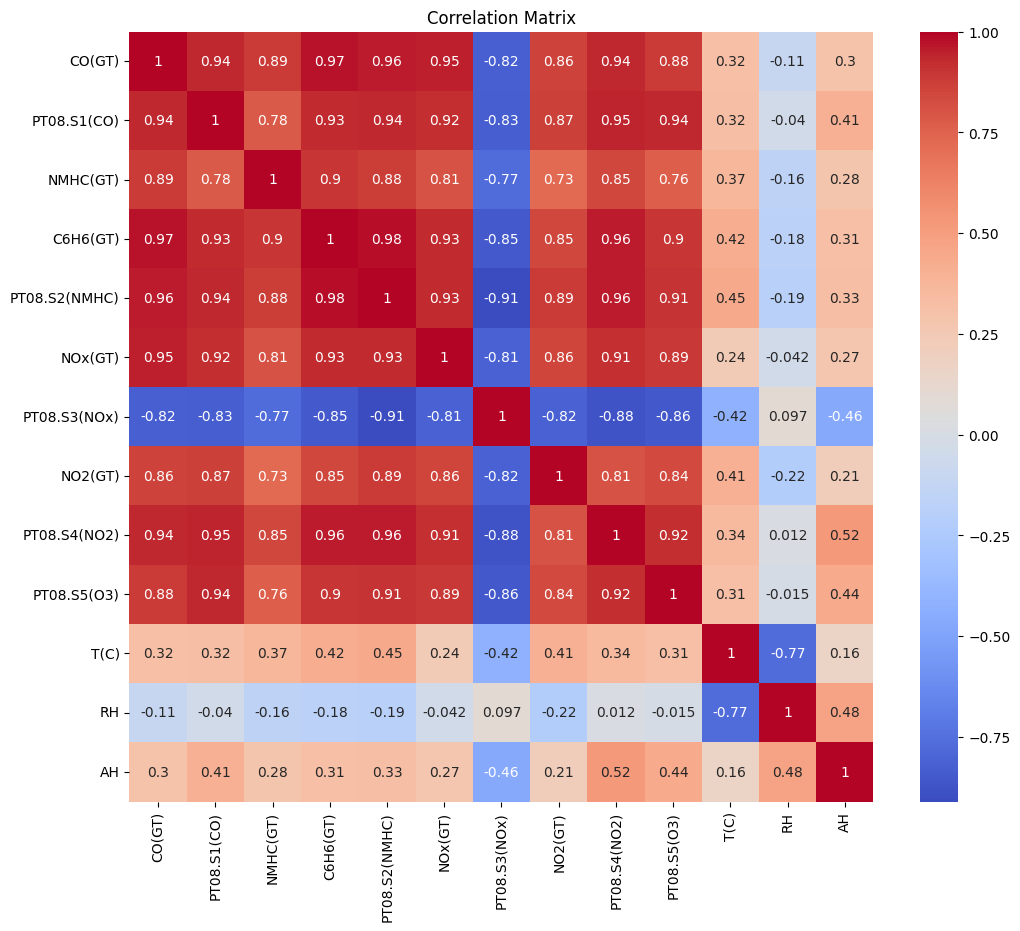

In [33]:
#Plotting correlation matrix

plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x1000 with 0 Axes>

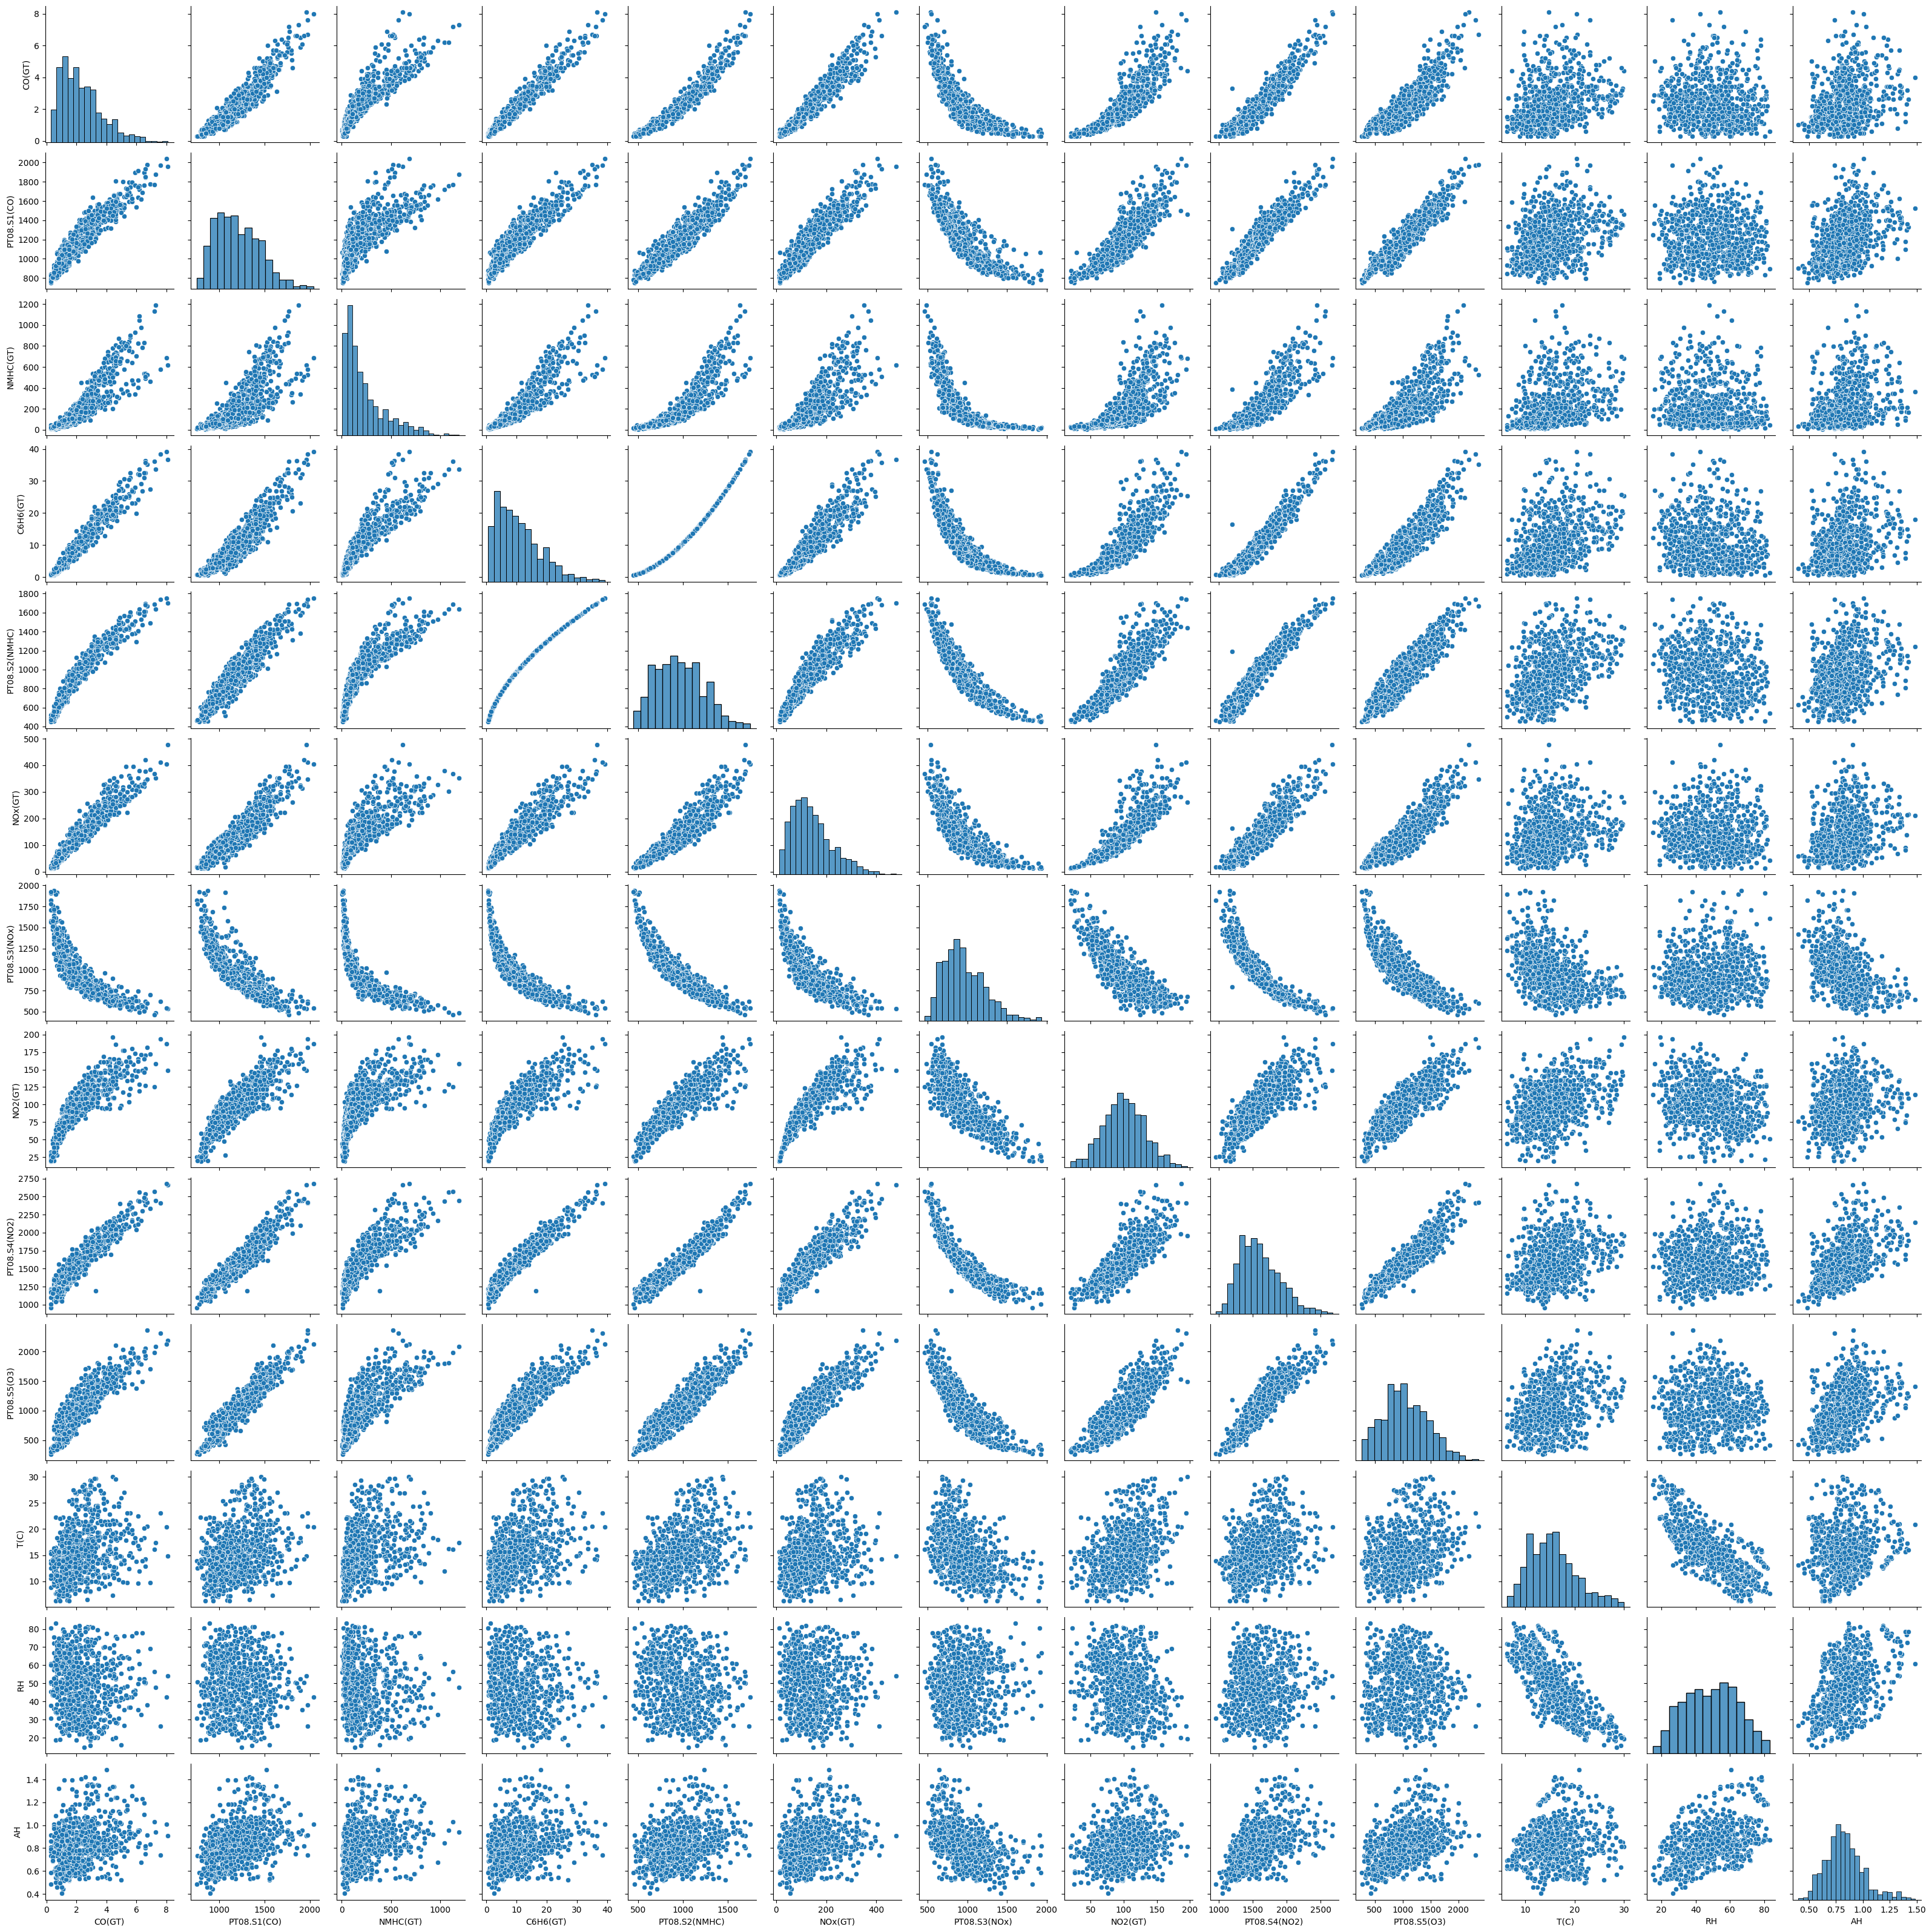

In [34]:
plt.figure(figsize=(12, 10))  # Set the figure size
sns.pairplot(data)
plt.show()

In [21]:
data['Week Day'] = data['Date'].dt.day_name() 

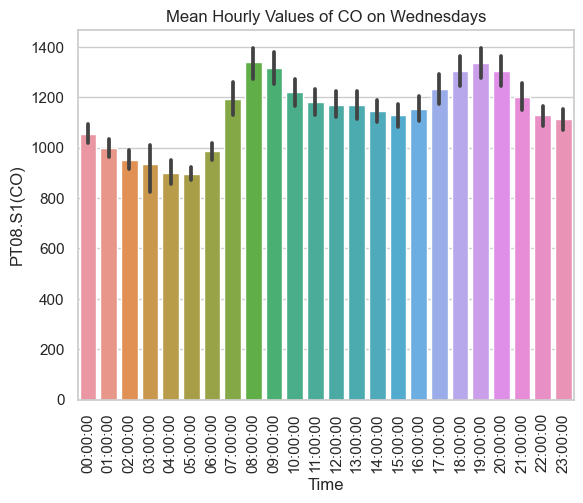

In [22]:
#Creating new dataframe with only wednesday data

data_wed = data[data['Week Day'] == 'Wednesday']

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=data_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [23]:
#The peak concentration of CO in the city are between 8 AM and 9 AM and between 6 PM and 8 PM,
#beginnings and endings of office hours, respectively.

In [24]:
#Splitting the dataset in 80% for training and 20% for testing

from sklearn.model_selection import train_test_split

Y = data['CO(GT)']
X = data[['PT08.S1(CO)', 'DayOfWeek','Hour' ,'T(C)', 'AH']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(5552, 5) (1389, 5)


In [27]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T(C)', 'RH', 'AH', 'DayOfWeek', 'Hour', 'PeakTime', 'Valley',
       'Week Day'],
      dtype='object')

In [110]:
from sklearn.ensemble import RandomForestRegressor

modelo_randomforest = RandomForestRegressor(n_estimators=100)

modelo_randomforest.fit(X_train, Y_train)

RandomForestRegressor()

In [111]:
#Test data evaluation

from sklearn import metrics

pred_randomforest = modelo_randomforest.predict(X_test) #predicted CO concentrations

print('Random Forest Regression Model: R²={:.2f}'.format(metrics.r2_score(Y_test, pred_randomforest)))

Random Forest Regression Model: R²=0.86


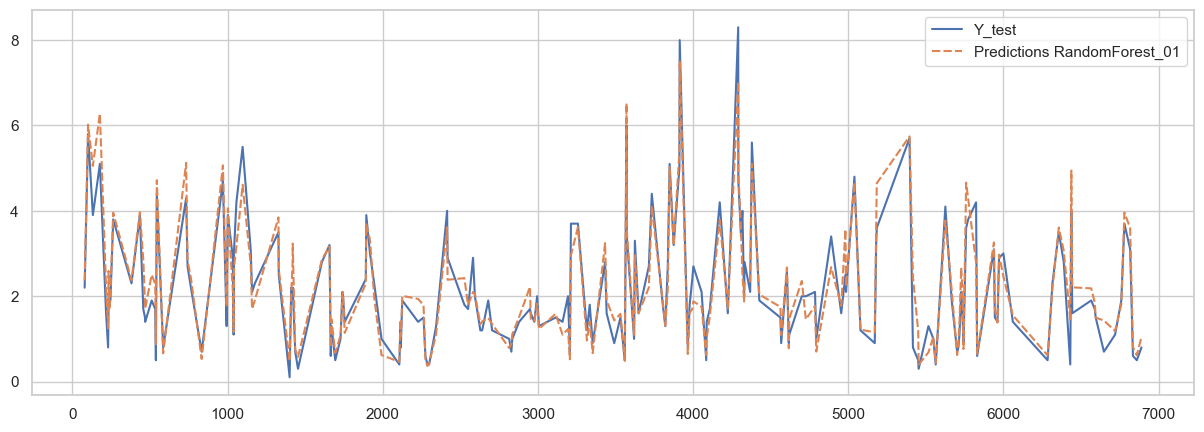

In [112]:
aux = pd.DataFrame()

aux['Y_test'] = Y_test
aux['Predictions RandomForest_01'] = pred_randomforest

plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

In [115]:
#Let us try to apply Decision tree regression technique and see if any improvement happens


from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
dt_one_reg=DecisionTreeRegressor()

In [116]:
dt_model=dt_one_reg.fit(X_train,Y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [118]:
print('Decision Tree Regressor: R²={:.2f}'.format(metrics.r2_score(Y_test, y_pred_dtone)))

Decision Tree Regressor: R²=0.69


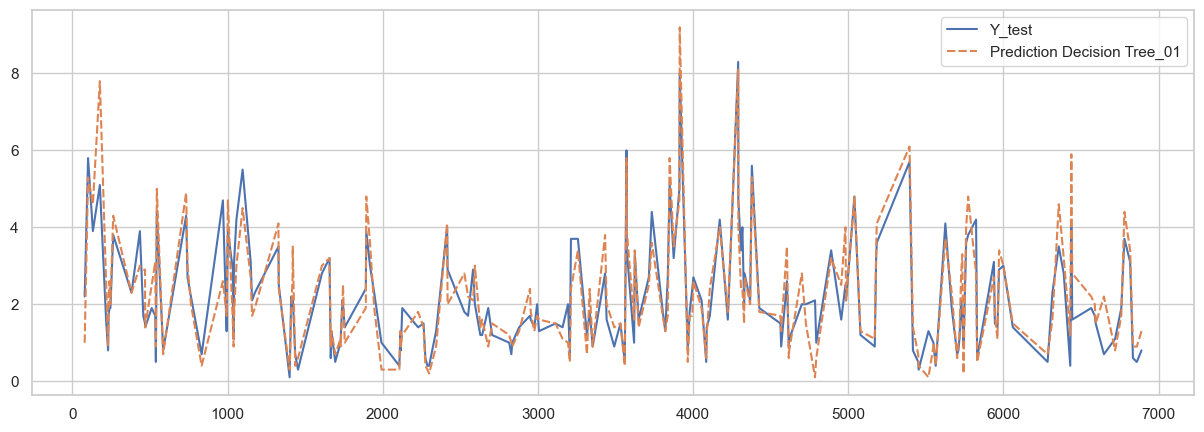

In [120]:
auxDT = pd.DataFrame()

auxDT['Y_test'] = Y_test
auxDT['Prediction Decision Tree_01'] = y_pred_dtone

plt.figure(figsize=(15,5))
sns.lineplot(data=auxDT.iloc[:200,:])
plt.show()

In conclusion, based on the R² values provided, the Random 
Forest Regression model is considered better than Decision Tree.